In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv("./Heart.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [115]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [116]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

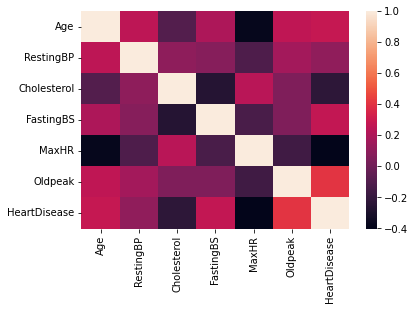

In [117]:
sns.heatmap(df.corr())

In [118]:
y = df["HeartDisease"]

In [119]:
x = df.drop("HeartDisease",axis=1)

0    58.0
dtype: float64

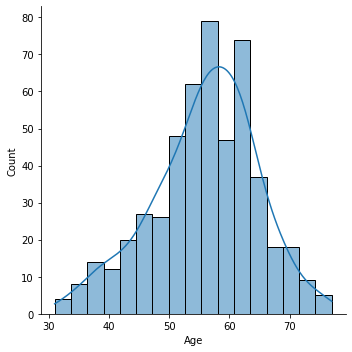

In [120]:
sns.displot(df["Age"].where(df["HeartDisease"]==1),kde=True)
df["Age"].where(df["HeartDisease"]==1).mode()

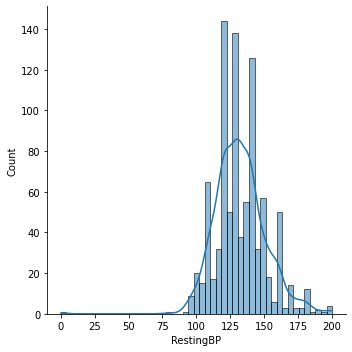

In [121]:
sns.displot(x["RestingBP"],kde=True)

175.94094488188978

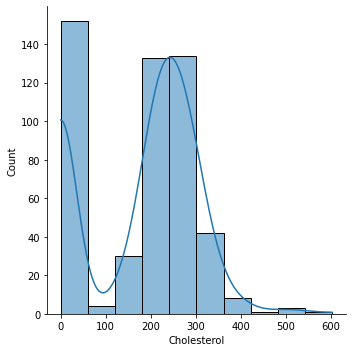

In [122]:
sns.displot(df["Cholesterol"].where(df["HeartDisease"]==1),kde=True)
df["Cholesterol"].where(df["HeartDisease"]==1).mean()

<AxesSubplot:>

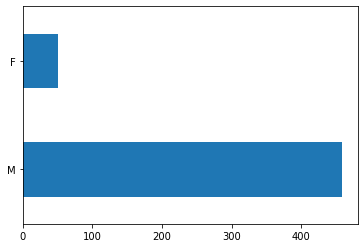

In [123]:
df["Sex"].where(df["HeartDisease"]==1).value_counts().plot.barh()

<AxesSubplot:>

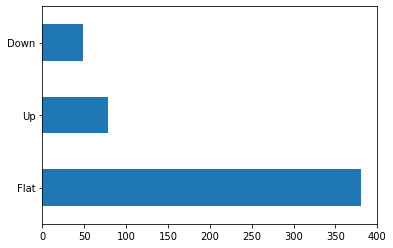

In [134]:
df["ST_Slope"].where(df["HeartDisease"]==1).value_counts().plot.barh()

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

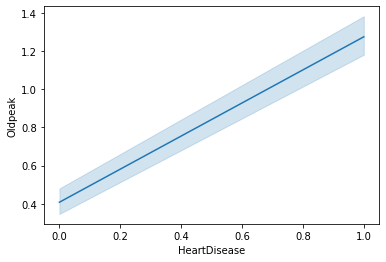

In [124]:
sns.lineplot(y = x["Oldpeak"],x = y)

<AxesSubplot:xlabel='HeartDisease', ylabel='FastingBS'>

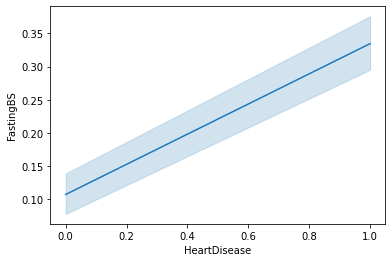

In [125]:
sns.lineplot(y = x["FastingBS"],x = y)

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

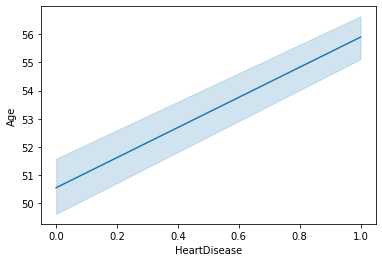

In [126]:
sns.lineplot(y = x["Age"],x = y)

In [127]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [128]:
x["Sex"].replace({"M":0,"F":1},inplace=True)
x["ChestPainType"].replace({"TA":0,"ATA":1,"NAP":2,"ASY":3},inplace=True)
x["RestingECG"].replace({"Normal":0,"ST":1,"LVH":2},inplace=True)
x["ExerciseAngina"].replace({"N":0,"Y":1},inplace=True)
x["ST_Slope"].replace({"Up":0,"Flat":1,"Down":2},inplace=True)

Age: age of the patient [years]
<br>
Sex: sex of the patient [M: Male, F: Female]
<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
<br>
RestingBP: resting blood pressure [mm Hg]
<br>
Cholesterol: serum cholesterol [mm/dl]
<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]
<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
<br>
HeartDisease: output class [1: heart disease, 0: Normal]

In [129]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,0,172,0,0.0,0
1,49,1,2,160,180,0,0,156,0,1.0,1
2,37,0,1,130,283,0,1,98,0,0.0,0
3,48,1,3,138,214,0,0,108,1,1.5,1
4,54,0,2,150,195,0,0,122,0,0.0,0


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [145]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [146]:
svm.score(x_test,y_test)

0.8768115942028986